In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data from All rooms template data and Pivot data for each signal

In [28]:
All_rooms_template = pd.read_csv("./data/All_rooms_template.csv")
All_rooms_template = All_rooms_template[All_rooms_template.room.str.startswith('RM', na=False)]
All_template_rooms = All_rooms_template.pivot_table('total_signal_count',['room','timestamp'],'template').fillna(0).reset_index()
All_template_rooms['total'] = All_template_rooms.select_dtypes(include=['float64']).sum(axis=1)

### define function to select few signals to see how the templates look for each room each day

In [29]:
def select_signals(x2):
    x1 = ["room","timestamp"]
    x = x1+x2
    def filter_signal(x):
        return All_template_rooms.filter(like=x)
    df = pd.DataFrame()
    for i in range(0,len(x)):
        df = pd.concat([df,filter_signal(x[i])],axis=1)
    df['total'] = df.select_dtypes(include=['float64']).sum(axis=1)
    df.sort_values(by=["total"],ascending=False)

    return pd.concat([df.select_dtypes(include=['object']),df.select_dtypes(include=['float64']).astype(int)],axis=1)

### Get the frequency of the following signals and find the room which has all 5 signals available and for what dates
    "Actual Cooling Setpoint"
    "Actual Heating Setpoint"
    "Damper Position"
    "Actual Supply Flow"
    "Zone Temperature"

In [108]:
x1 = ["room","timestamp"]
x2 = ["Actual Cooling Setpoint","Actual Heating Setpoint","Damper Position","Actual Supply Flow","Zone Temperature"]
df = select_signals(x2)[x1+x2]
dfsrooms = df[(df["Actual Cooling Setpoint"]!=0)&(df["Actual Heating Setpoint"]!=0)&(df["Damper Position"]!=0)&\
              (df["Actual Supply Flow"]!=0)&(df["Zone Temperature"]!=0)]
dfsrooms.head()

template,room,timestamp,Actual Cooling Setpoint,Actual Heating Setpoint,Damper Position,Actual Supply Flow,Zone Temperature
19942,RM-1156,2015-02-06,804,804,804,804,210
19943,RM-1156,2015-02-07,792,792,792,792,792
19944,RM-1156,2015-02-08,795,795,795,795,795
19945,RM-1156,2015-02-09,804,804,804,804,804
19946,RM-1156,2015-02-10,801,801,801,801,801


### Only room that has all the 5 signals is Rm 1156 (We have not check if they could be Nan Values)
        "Actual Cooling Setpoint"
        "Actual Heating Setpoint"
        "Damper Position"
        "Actual Supply Flow"
        "Zone Temperature"


In [110]:
dfsrooms.room.unique()

array(['RM-1156'], dtype=object)

### The dates when all the signals for Rm 1156 is available is as below

In [112]:
dfsrooms.timestamp.unique()

array(['2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09',
       '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13',
       '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17',
       '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21',
       '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25',
       '2015-02-26', '2015-02-27', '2015-02-28', '2015-03-01',
       '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
       '2015-03-06', '2015-03-07', '2015-03-08', '2015-03-09',
       '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13',
       '2015-03-14', '2015-03-15', '2015-03-16', '2015-03-17',
       '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-21',
       '2015-03-22', '2015-03-23', '2015-03-24', '2015-03-25',
       '2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
       '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
       '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
       '2015-04-07', '2015-04-08', '2015-04-09', '2015-

### Plot the availability of signal distribution by each month when the data is available between Feb 2015 to May 2015

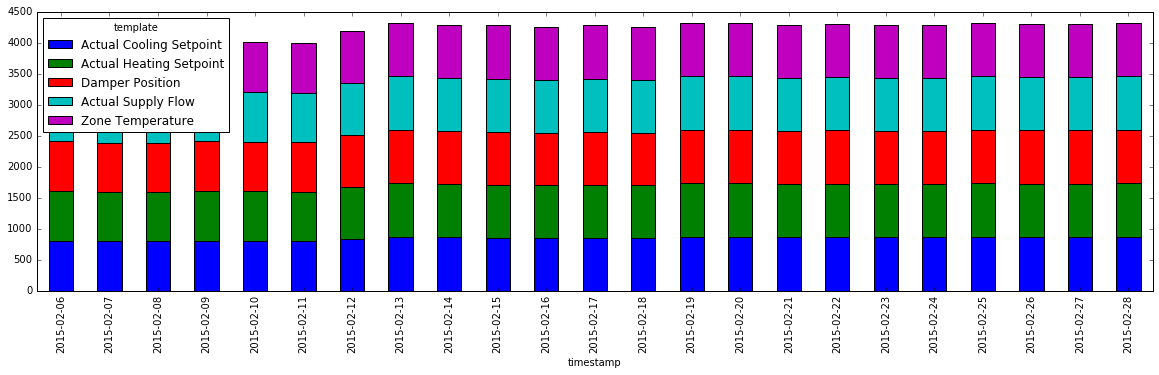

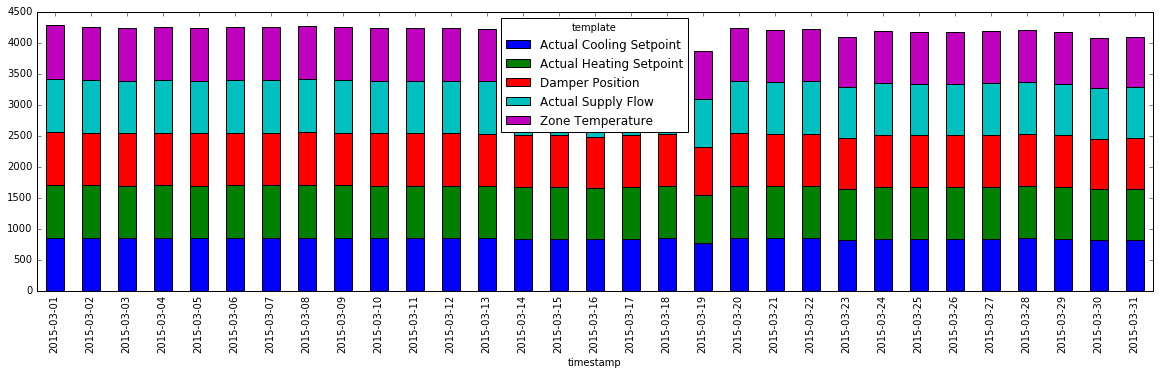

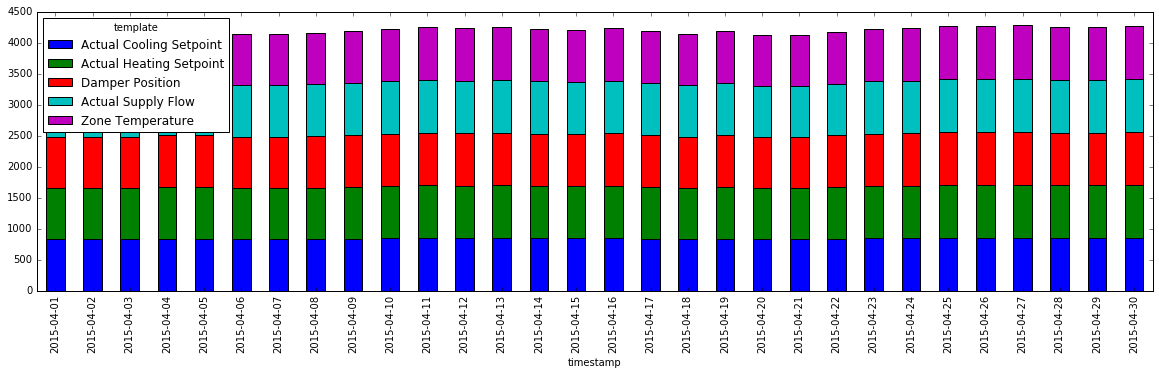

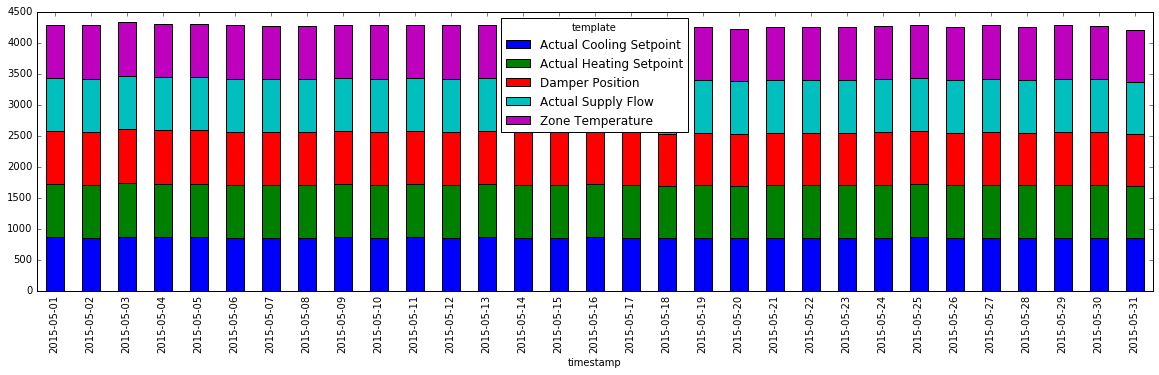

In [107]:
plt.figure()
for m in pd.to_datetime(dfsrooms["timestamp"]).dt.month.unique():
    dfs = dfsrooms[pd.to_datetime(dfsrooms["timestamp"]).dt.month==m]
    dfs[["timestamp","Actual Cooling Setpoint","Actual Heating Setpoint","Damper Position","Actual Supply Flow",\
          "Zone Temperature"]].set_index("timestamp").plot(kind="bar",stacked=True,figsize=(20,5))